In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import nonint, find_fixpoint
from quant_met.configuration import Configuration
from quant_met import plotting

In [2]:
lattice_constant = np.sqrt(3)

[0, 0.24999999999999994, 0.37499999999999994, 0.5, 0.7500000000000001, 1]
['$\\Gamma$', '$K$', '$M$', '$K^{\\prime}$', '$K$', '$\\Gamma$']


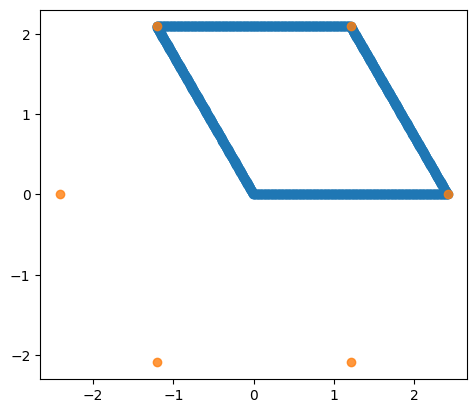

In [14]:
all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(Gamma, r'\Gamma'), (all_K_points[1], 'K'), (M, 'M'), (all_K_points[0], r'K^{\prime}'), (all_K_points[5], r'K')]

whole_path, whole_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

BZ_path_plot = plotting.plot_into_bz(all_K_points, whole_path)

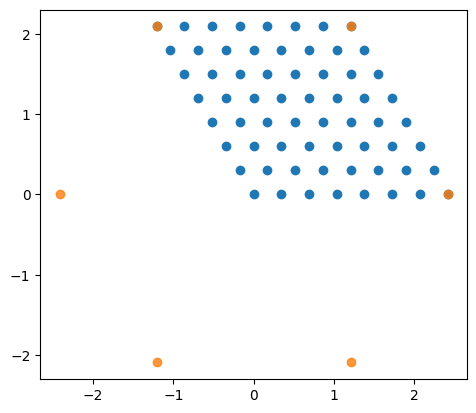

In [15]:
BZ_grid = find_fixpoint.generate_k_space_grid(8, 8, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

Time taken to solve the gap equation: 4.36 seconds


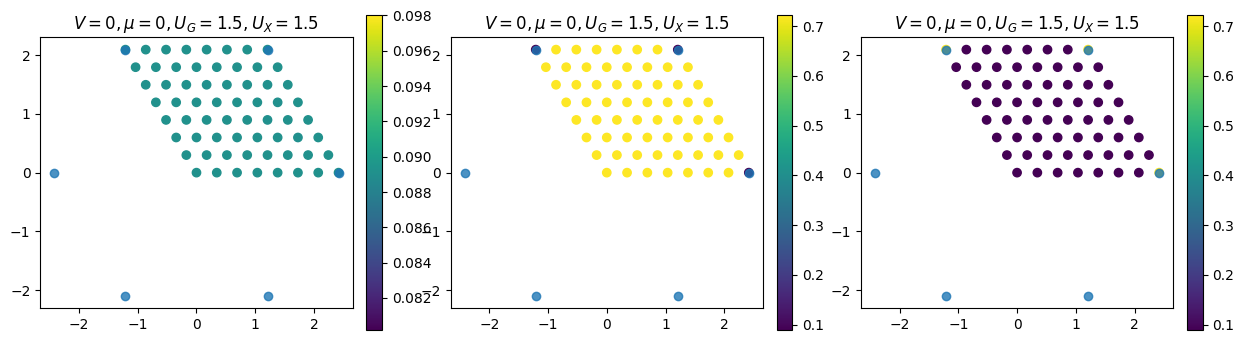

In [18]:
import time

config = Configuration(t_gr=1, t_x=0.01, a=lattice_constant, U_Gr=1.5, U_X=1.5, V=0, mu=0, beta=10000)

start = time.time()
delta = find_fixpoint.solve_gap_equation(config, BZ_grid)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
delta_interpolated = find_fixpoint.interpolate_gap(delta, whole_path)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(3*5, 5))

for delta, ax in zip(delta.data[['delta_1', 'delta_2', 'delta_3']].to_numpy().T, axs):
    ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

Text(0.5, 1.0, '$V = 0, \\mu = 0$')

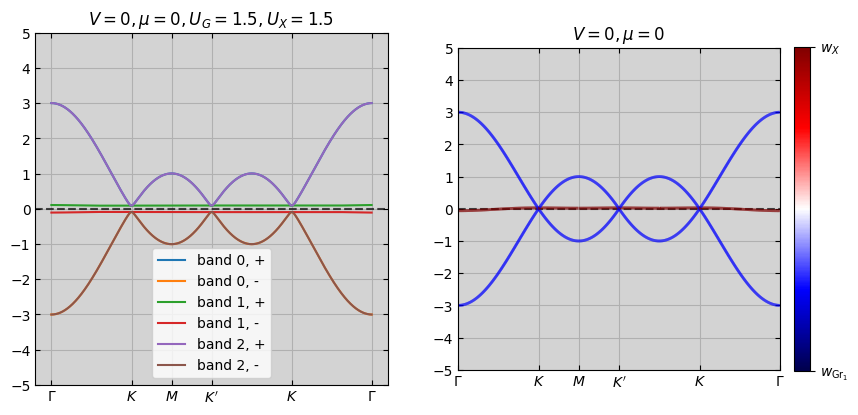

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

energies_on_bandpath, _ = nonint.generate_bloch(whole_path, config)

plotting.plot_bcs_bandstructure(energies_on_bandpath.T, delta_interpolated.data[['delta_1', 'delta_2', 'delta_3']].to_numpy().T, whole_path_plot, ticks, labels, fig, axs[0])
axs[0].set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")

band_structure = nonint.calculate_bandstructure(config, whole_path)
bands = band_structure[['band_1', 'band_2', 'band_3']].to_numpy().T
overlaps = band_structure[['wx_1', 'wx_2', 'wx_3']].to_numpy().T
plotting.plot_nonint_bandstructure(bands, overlaps, whole_path_plot, ticks, labels, fig, axs[1])
axs[1].set_title(f"$V = {config.V}, \\mu = {config.mu}$")